In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Runners are assigned bases BEFORE the pitch
# This will make it easier to calculate run matrix in the future
def baserunners(data):
    
    data['runners_on_1st'] = None
    data['runners_on_2nd'] = None
    data['runners_on_3rd'] = None
    
    for i in range(0, len(data)):

        # New inning means no runners on
        if data['PitchofPA'].iloc[i] == 1 and data['PAofInning'].iloc[i] == 1:
            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]
            continue

        previous_runners = (data['runners_on_1st'].iloc[i-1], data['runners_on_2nd'].iloc[i-1], data['runners_on_3rd'].iloc[i-1])

        previous_first = previous_runners[0]
        previous_second = previous_runners[1]
        previous_third = previous_runners[2]

        previous_outs = data['OutsOnPlay'].iloc[i-1]
        previous_runs = data['RunsScored'].iloc[i-1]
        previous_pitch = data['PitchCall'].iloc[i-1]
        previous_KorBB = data['KorBB'].iloc[i-1]

        # What happens for single?
        # Single GUARANTEES a runner on first at the end of the play
        # All outs will go to the lead runner, unless they scored
        if data['PlayResult'].iloc[i-1] == 'Single':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):
                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]          

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Fourth Combination, done    
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):
                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1] 

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]     

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_outs == 0 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                #Runs scored = 0
                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

        elif data['PlayResult'].iloc[i-1] == 'Double':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]         

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):
                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]    

                elif previous_outs == 1 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_outs == 2 and previous_runs == 0:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                #Runs scored = 0
                else:
                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

        elif data['PlayResult'].iloc[i-1] == 'Triple':

            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1] 

        elif data['PlayResult'].iloc[i-1] == 'HomeRun':

            data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0] 

        # All Errors have previous_outs = 0
        # Some Errors have previous_runs > 0
        elif data['PlayResult'].iloc[i-1] == 'Error':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]   

                else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]  

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                if previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]


                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]    

                else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                elif previous_runs == 3:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]            

        # FieldersChoice can have outs_before = 0 or 1
        # FieldersChoice can have runs_before = 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'FieldersChoice':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1 or previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]


                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]


        # Out means outs_before must be >= 1
        # Out means runs_before can equal 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'Out':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1 or previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]           


                elif previous_runs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]   

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]  

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]           

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]



            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 2:


                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                elif previous_runs == 2:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                elif previous_runs == 3:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]


        # outs_before can equal 1 or 2
        # runs_before can equal 0 or 1
        elif data['PlayResult'].iloc[i-1] == 'Sacrifice': 

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]


            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]         

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]  

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]           

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]             


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_runs == 1:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:
                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]


            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]


            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]

                    else: 

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]

                else:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    else:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1]



            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_runs == 1:

                    if previous_outs == 1:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                    elif previous_outs == 2:

                        data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]



        # Use PitchCall along with following scenarios scenarios
        # RunsScored = 0 AND OutsOnPlay = 0: BallIntentional, Undefined, BallinDirt
        # RunsScored = 0 or 1 AND OutsOnPlay = 0: Ball, HitByPitch, BallCalled
        # RunsScored = 0 AND OutsOnPlay = 0 or 1: StrikeCalled, FoulBall, StrikeSwinging
        # RunsScored = 0 or 1 AND OutsOnPlay = 0 or 1: 



        # Assuming All Walks can only be one run
        # If not a walk then 0 runs scored
        # Does not account for stolen bases
        elif data['PlayResult'].iloc[i-1] == 'Undefined':

            # First Combination, done
            if (previous_first == 0) and (previous_second == 0) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0]

                else: 

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]  

            # Second Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 0]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 0]         

            # Third Combination, done
            elif (previous_first == 0) and (previous_second == 1) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 1, 1]    


            # Fourth Combination, done
            elif (previous_first == 0) and (previous_second == 0) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [0, 0, 1] 


            #Fifth Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 0] 

            # Sixth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 0):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 0] 


            # Seventh Combination, done
            elif (previous_first == 1) and (previous_second == 0) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 0, 1] 

            # Eighth Combination, done
            elif (previous_first == 1) and (previous_second == 1) and (previous_third == 1):

                if previous_KorBB == 'Walk':

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]            

                else:

                    data.loc[i, ['runners_on_1st', 'runners_on_2nd', 'runners_on_3rd']] = [1, 1, 1]
    
    # Adds a column that encodes each runner state
    runners_dict = {(0,0,0):0, (1,0,0):1, (0,1,0):2, (1,1,0):3, (0,0,1):4, (1,0,1):5, (0,1,1):6, (1,1,1):7}
    data['runners_code'] = data.apply(
        lambda row: -1 if pd.isnull(row['runners_on_1st']) or pd.isnull(row['runners_on_2nd']) or pd.isnull(row['runners_on_3rd'])
        else runners_dict[(row['runners_on_1st'], row['runners_on_2nd'], row['runners_on_3rd'])], 
        axis=1
    )
                                   
    return

In [3]:
# Function that encodes each count state
def count(data):
    
    count_dict = {(0,2):0, (1,2):1, (0,1):2, (2,2):3, (1,1):4, (0,0):5, 
                  (1,0):6, (2,1):7, (3,2):8, (2,0):9, (3,1):10, (3,0):11}
    data['count_code'] = data.apply(lambda row: count_dict[(row['Balls'], row['Strikes'])], axis=1)
    
    return

In [4]:
# Function that calculates the number of runs scored in an inning after each pitch
# This is needed to calculate the run expectancy matrix
def runs_scored(data):
    
    data['tot_runs_scored'] = None
    runs = 0
    
    for i in range(len(data)-1, -1, -1):
        runs += data['RunsScored'].iloc[i]
        data.at[i, 'tot_runs_scored'] = runs
        if i == len(data) - 1:
            pass
        elif data['Inning'].iloc[i] != data['Inning'].iloc[i+1]:
            runs = 0
            
    return

In [5]:
# data = pd.read_csv('Ultimate_UCSB_24 - Ultimate_UCSB_24.csv', low_memory=False)
data = pd.read_csv('2024Data.csv', low_memory=False)
data.head()

,Outs,Balls,Strikes,Inning,PitchofPA,PAofInning,PitchCall,KorBB,PlayResult,OutsOnPlay,RunsScored,PlateLocHeight,PlateLocSide
0,2,1,1,7,3,3,BallCalled,Undefined,Undefined,0,0,1.05738,-1.08840
1,0,2,0,6,3,1,InPlay,Undefined,Out,1,0,2.75692,-0.92841
2,0,0,2,10,3,2,BallCalled,Undefined,Undefined,0,0,0.89149,-1.95470
3,2,1,2,9,4,6,FoulBall,Undefined,Undefined,0,0,2.16075,-0.69909
4,0,0,0,5,1,1,BallCalled,Undefined,Undefined,0,0,1.10201,-1.30061


In [6]:
# Fixing some errors in the data
data.loc[data['Outs'] == 3, 'Outs'] = 2
data.loc[(data['Strikes'] == 3) | (data['Strikes'] == 4), 'Strikes'] = 2
data.loc[data['Balls'] == 4, 'Balls'] = 3

In [7]:
data[data['Strikes']==4]

,Outs,Balls,Strikes,Inning,PitchofPA,PAofInning,PitchCall,KorBB,PlayResult,OutsOnPlay,RunsScored,PlateLocHeight,PlateLocSide


In [8]:
# Adding swing/take, baserunners, count, and total runs scored columns
data['Swing/Take'] = 'Take'
data.loc[data['PitchCall'].isin(['StrikeSwinging', 'InPlay', 'FoulBall']), 'Swing/Take'] = 'Swing'
baserunners(data)
count(data)
runs_scored(data)
data.head()

,Outs,Balls,Strikes,Inning,PitchofPA,PAofInning,PitchCall,KorBB,PlayResult,OutsOnPlay,RunsScored,PlateLocHeight,PlateLocSide,Swing/Take,runners_on_1st,runners_on_2nd,runners_on_3rd,runners_code,count_code,tot_runs_scored
0,2,1,1,7,3,3,BallCalled,Undefined,Undefined,0,0,1.05738,-1.08840,Take,None,None,None,-1,4,0
1,0,2,0,6,3,1,InPlay,Undefined,Out,1,0,2.75692,-0.92841,Swing,None,None,None,-1,9,0
2,0,0,2,10,3,2,BallCalled,Undefined,Undefined,0,0,0.89149,-1.95470,Take,None,None,None,-1,0,0
3,2,1,2,9,4,6,FoulBall,Undefined,Undefined,0,0,2.16075,-0.69909,Swing,None,None,None,-1,1,0
4,0,0,0,5,1,1,BallCalled,Undefined,Undefined,0,0,1.10201,-1.30061,Take,0,0,0,0,5,0


In [9]:
# Run expectancy matrix
shape = (3, 8, 12)
run_exp_mat = np.full(shape, None, dtype=object)
for i in range(run_exp_mat.shape[0]):
    for j in range(run_exp_mat.shape[1]):
        for k in range(run_exp_mat.shape[2]):
            run_exp_mat[i, j, k] = np.mean(data['tot_runs_scored'][(data['Outs']==i) & 
                                                                   (data['runners_code']==j) & 
                                                                   (data['count_code']==k)])
run_exp_mat = np.array(run_exp_mat, dtype=float)

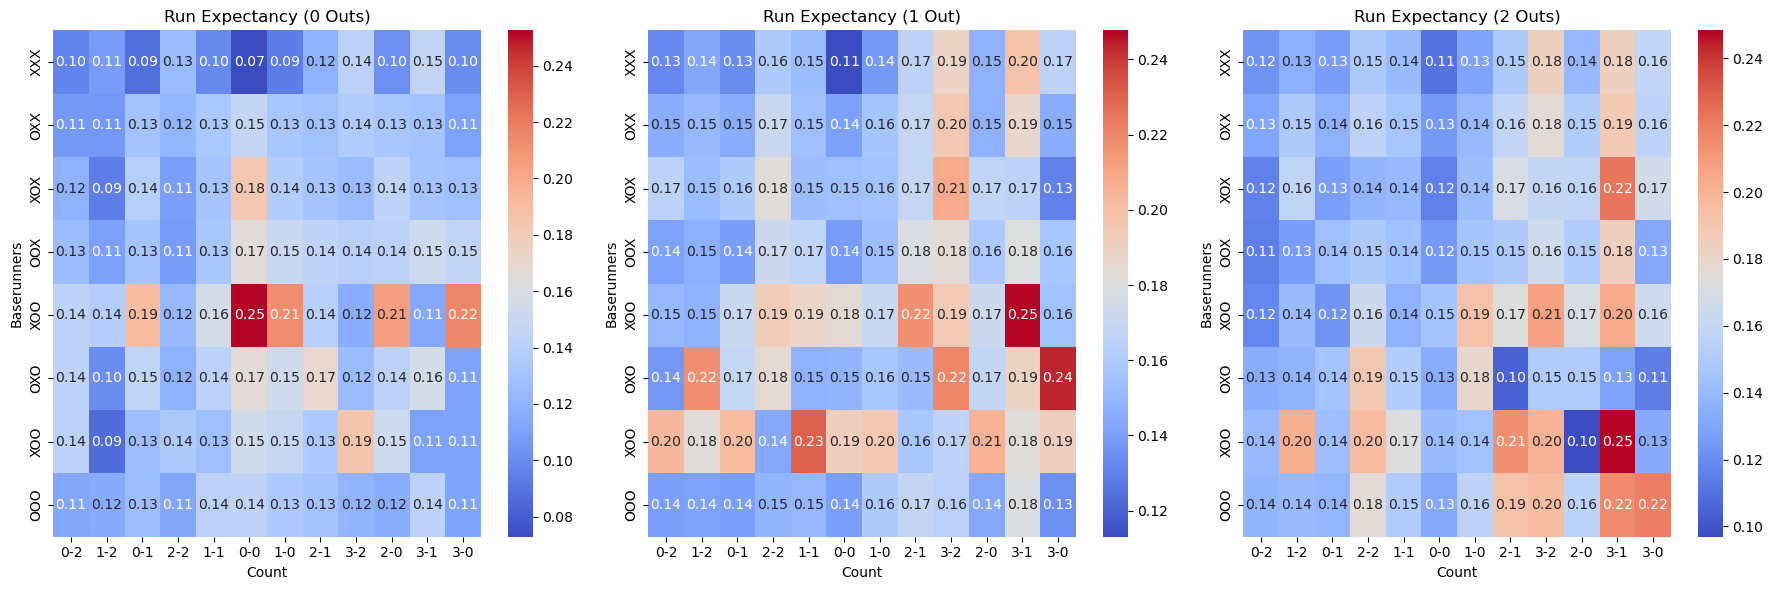

In [10]:
# column and row labels
row_labels = ['XXX', 'OXX', 'XOX', 'OOX', 'XOO', 'OXO', 'XOO', 'OOO']
col_labels = ['0-2', '1-2', '0-1', '2-2', '1-1', '0-0', '1-0', '2-1', '3-2', '2-0', '3-1', '3-0']

# Create a 1x3 subplot for the three heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each heatmap for outs 0, 1, and 2
for out in range(3):
    sns.heatmap(run_exp_mat[out, :, :], annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=col_labels, yticklabels=row_labels, ax=axes[out])
    if out == 1:
        axes[out].set_title(f'Run Expectancy ({out} Out)')
    else:
        axes[out].set_title(f'Run Expectancy ({out} Outs)')
    axes[out].set_xlabel('Count')
    axes[out].set_ylabel('Baserunners')

plt.tight_layout()

In [11]:
# Function to calculate the pre pitch, post pitch, and change in expected run value
def exp_run_val(data, mat):

    # Pre pitch expected run value
    data['ERV_pre'] = data.apply(
        lambda row: None if (row['Outs'] == -1 or row['runners_code'] == -1 or row['count_code'] == -1)
        else mat[row['Outs'], row['runners_code'], row['count_code']], 
        axis=1
    )

    # Post pitch expected run value
    data['ERV_post'] = None
    for i in range(len(data)):
        if (i == len(data) - 1) or (data['Outs'].iloc[i] + data['OutsOnPlay'].iloc[i] == 3): 
            data.at[i, 'ERV_post'] = 0
        else:
            data.at[i, 'ERV_post'] = data['ERV_pre'].iloc[i + 1] + data['RunsScored'].iloc[i]
            
    # Change in expected run value
    data['ERV_delta'] = data['ERV_post'] - data['ERV_pre']
    
    return

In [12]:
exp_run_val(data, run_exp_mat)
data.head()

,Outs,Balls,Strikes,Inning,PitchofPA,PAofInning,PitchCall,KorBB,PlayResult,OutsOnPlay,...,Swing/Take,runners_on_1st,runners_on_2nd,runners_on_3rd,runners_code,count_code,tot_runs_scored,ERV_pre,ERV_post,ERV_delta
0,2,1,1,7,3,3,BallCalled,Undefined,Undefined,0,...,Take,None,None,None,-1,4,0,NaN,NaN,NaN
1,0,2,0,6,3,1,InPlay,Undefined,Out,1,...,Swing,None,None,None,-1,9,0,NaN,NaN,NaN
2,0,0,2,10,3,2,BallCalled,Undefined,Undefined,0,...,Take,None,None,None,-1,0,0,NaN,NaN,NaN
3,2,1,2,9,4,6,FoulBall,Undefined,Undefined,0,...,Swing,None,None,None,-1,1,0,NaN,0.072893,NaN
4,0,0,0,5,1,1,BallCalled,Undefined,Undefined,0,...,Take,0,0,0,0,5,0,0.072893,0.110282,0.037389


In [18]:
# Cleaned data ready for machine learning
data_cleaned = data[['Swing/Take', 'Outs', 'runners_code', 'count_code', 'PlateLocHeight', 'PlateLocSide', 'ERV_delta']].copy()
colnames = data_cleaned.columns.tolist()
colnames[2] = 'Runners'
colnames[3] = 'Count'
data_cleaned.columns = colnames
data_cleaned.head()

,Swing/Take,Outs,Runners,Count,PlateLocHeight,PlateLocSide,ERV_delta
0,Take,2,-1,4,1.05738,-1.08840,NaN
1,Swing,0,-1,9,2.75692,-0.92841,NaN
2,Take,0,-1,0,0.89149,-1.95470,NaN
3,Swing,2,-1,1,2.16075,-0.69909,NaN
4,Take,0,0,5,1.10201,-1.30061,0.037389


In [16]:
data_cleaned['ERV_delta'].isnull().sum()

99198

In [19]:
data_cleaned.shape[0]

1484322